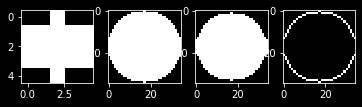

In [3]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

kernel_ones = np.ones((5,5))
kernel_s = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

plt.subplot(1,4,1)
plt.imshow(tip_spacing, cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(kernel_hole, cmap = 'gray')
plt.subplot(1,4,3)
plt.imshow(kernel_hole_e, cmap = 'gray')
plt.subplot(1,4,4)
plt.imshow(kernel_hole_ring, cmap = 'gray')

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)
img_d = cv2.bitwise_or(img, img_c)
gear_body = cv2.morphologyEx(img_d, cv2.MORPH_OPEN, kernel_hole_e)
gear_body = cv2.dilate(gear_body, kernel_dot, iterations=2)
img_e = cv2.morphologyEx(gear_body, cv2.MORPH_GRADIENT, kernel_s)
img_f = cv2.bitwise_and(img_e, img_d)
img_f = cv2.convertScaleAbs(img_f, alpha = 4)
img_g = cv2.dilate(img_f, kernel_ones, iterations=1)
img_g = cv2.convertScaleAbs(img_g, alpha = 4)
img_h = cv2.subtract(img_e, img_g)
img_h = cv2.dilate(img_h, kernel_dot, iterations=1)
img_h = cv2.convertScaleAbs(img_h, alpha = 4)
img_h = cv2.dilate(img_h, defect_cue, iterations=1)
img_g = cv2.erode(img_g, kernel_dot, iterations=1)
img_h = cv2.bitwise_or(img_h, img_g)

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)
cv2.imshow('(e)', img_e)
cv2.imshow('(f)', img_f)
cv2.imshow('(g)', img_g)
cv2.imshow('(h)', img_h)

cv2.waitKey()
cv2.destroyAllWindows()

## HW2 Report

In this homework I learned how to use Morphological Filter from OpenCV library and it is very interesting to try out how 
those filters can be combined into to reach our goal - detect missing teeth from a gear picture.

Bascially it is all about experiment with some basic knowlegdes about image processing. When you want to make the boundry bigger or thicker, use dilate filter and when the situation come to contrary way it is time to use erode filter. Using a bigger circle substracted from a smaller cilcle to get a ring structure element and also others. I have a fun and enjoy the homework this time.